<a href="https://colab.research.google.com/github/thaonguyen274/Machine-Learning-with-Python/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Tự biến đổi lại thuật toán logistic regression, từ xây dựng công thức, likelihood, maximize likelihood, đạo làm negative log likelihood theo ma trận hệ số.


The model logistic regression is defined as:
$$P(C_1|\phi) = y(\phi) = \sigma (w^T\phi)$$ 
$$P(C_2|\phi) = y(\phi) =1 -  \sigma (w^T\phi)$$

For a data set $\phi_n, t_n$ where $t_n \in $ {0,1} and $\phi_n = \phi(x_n)$ with $n = 1,2,...,N$ , the likelihood function can be written :
$$p(t|w) = \prod_{n=1}^N y_n^{t_n}(1-y_n)^{1-t_n} $$
where:
$$ t = (t_1,t_2,..t_N)^T \quad and \quad y_n = p(C_1|\phi_n)$$

Loss function:
$$ L= - log \, p(t|w) = -\sum_{n=1}^N[\, t_nlog \, y_n + (1-t_n)log(1-y_n)\,]$$

where $y_n = \sigma (a_n)$  and  $a_n = w^T\phi_n$

Using chain rule we have: 
$$\dfrac{\partial L}{\partial w_0} = \dfrac{\partial L}{\partial y_n}.\dfrac{\partial y_n}{\partial a_n}.\dfrac{\partial a_n}{\partial w_0} $$ 
$$= - [ (\dfrac{t_n}{y_n} - \dfrac{1-t_n}{1-y_n}).y_n(1-y_n).1] $$ 
$$=-[t_n(1-y_n)-y_n(1-t_n)]$$ 
$$= y_n - t_n$$ 
$$\dfrac{\partial L}{\partial w_1} = \dfrac{\partial L}{\partial y_n}.\dfrac{\partial y_n}{\partial a_n}.\dfrac{\partial a_n}{\partial w_1} $$ 
$$= - [ (\dfrac{t_n}{y_n} - \dfrac{1-t_n}{1-y_n}).y_n(1-y_n).\phi_1] $$ 
$$=-[t_n(1-y_n)-y_n(1-t_n)].\phi_1$$ 
$$= (y_n - t_n)\phi_1$$ 
$$\Rightarrow \dfrac{\partial L}{\partial w} = \dfrac{1}{N} \phi^T(y_n-t_n) $$


2.Tìm hàm $f(x)$, biết $f'(x) = f(x)(1-f(x))$




We have:
$$f'(x) = f(x)(1-f(x))$$ 

$$\Leftrightarrow \dfrac{df(x)}{dx} = f(x)(1-f(x))$$ 

$$\Leftrightarrow \dfrac{df(x)}{f(x)(1-f(x))} = dx$$ 

$$\Leftrightarrow \int \dfrac{df(x)}{f(x)(1-f(x))} = \int dx$$ 

$$\Leftrightarrow \int [\dfrac{1}{f(x)} + \dfrac{1}{1-f(x)} ]df(x) = \int dx $$ 
$$ \Leftrightarrow ln|f(x)|-ln|1-f(x)| = x + C$$  

$$\Leftrightarrow ln|\dfrac{f(x)}{1-f(x)}| = x+C$$ 

$$\Leftrightarrow \dfrac{f(x)}{1-f(x)} = e^{x+C} $$ 

$$ \Leftrightarrow \dfrac{1}{1-f(x)} = 1 + e^{x+C} $$ 

$$ \Leftrightarrow 1 - f(x) = \dfrac{1}{1+e^{x+C}}$$ 

$$ \Leftrightarrow f(x) = \dfrac{e^{x+C}}{1+e^{x+C}}  $$

3. Dùng thuật toán gradient descent tối ưu hàm f(x) = x^2, với giá trị khởi tạo x = 2 và thử các learning rate khác nhau (0.2, 1, 2), vẽ đồ thị hàm loss để hiện sự thay đổi hàm f(x) sau các bước update.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Learning Rate = 0.2


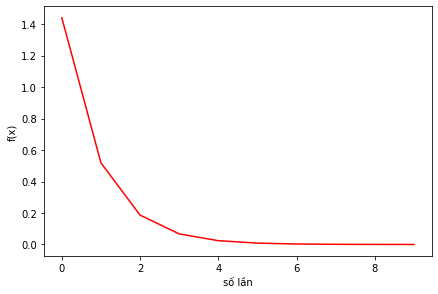

Learning Rate = 1


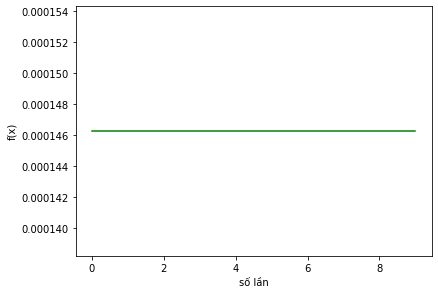

Learning Rate = 2


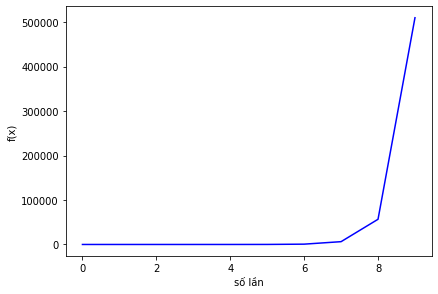

In [2]:
x = 2
learning_rate = [0.2,1,2]
cl = ['r','g','b']
for  j, lr in enumerate(learning_rate):
  y = []
  for i in range(10):
    x = x - lr*2*x
    y.append(x**2)
  print("Learning Rate = {}".format(lr))
  plt.plot(y, color = cl[j])
  plt.tight_layout()
  plt.xlabel('số lần')
  plt.ylabel('f(x)')
  plt.show()

4. Dùng thuật toán logistic regression phân loại hồ sơ cho vay hay không \\
a, Xây dựng model, tìm tham số. \\
b, Dự đoán với các hồ sơ sau: (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).

In [3]:
import pandas as pd

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv').values
row , col = data.shape
print("Row = {} , Col = {}".format(row,col))

Row = 20 , Col = 3


In [6]:
x = data[:, :col-1].reshape(-1, col-1)
y = data[:, col-1].reshape(-1, 1)

In [7]:
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

Text(0, 0.5, 'Kinh nghiệm (năm)')

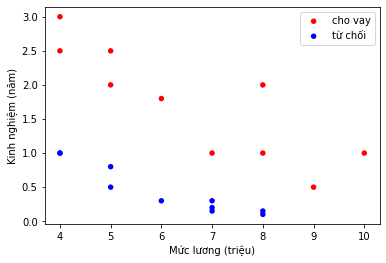

In [8]:
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend()
plt.xlabel('Mức lương (triệu)')
plt.ylabel('Kinh nghiệm (năm)')

In [9]:
x = np.hstack((np.ones((row, 1)), x))

w = np.array([0.,1,1]).reshape(-1,1)

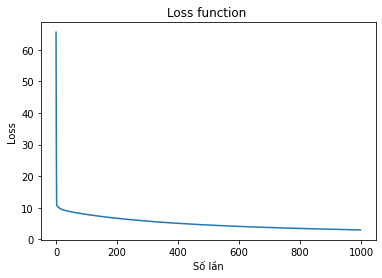

In [10]:
Iteration = 1000
loss = []
learning_rate = 0.01
for i in range(1,Iteration): 
    y_predict = sigmoid(np.dot(x, w))
    L = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    w = w - learning_rate * np.dot(x.T, y_predict-y)
    loss.append(L)
plt.plot(loss)
plt.title("Loss function ")
plt.xlabel("Số lần")
plt.ylabel("Loss")
plt.show()

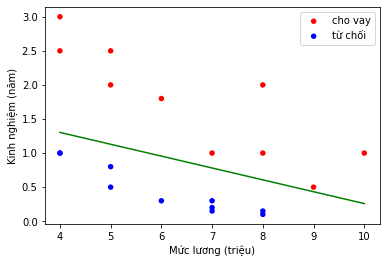

In [11]:
t = 0.5
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend()
plt.xlabel('Mức lương (triệu)')
plt.ylabel('Kinh nghiệm (năm)')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

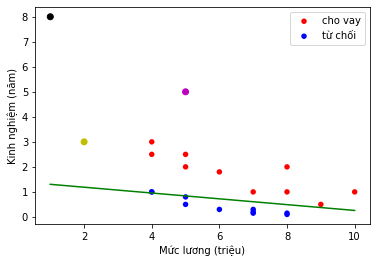

In [12]:
#Dự đoán với các hồ sơ sau: (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).
x = [2,1,5]
y = [3,8,5]
cl = ['y','k','m']   
t = 0.5
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.scatter(x,y, c = cl)
plt.legend()
plt.xlabel('Mức lương (triệu)')
plt.ylabel('Kinh nghiệm (năm)')
plt.plot((1, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()
